## Описание проекта
Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и
количество детей клиента на факт погашения кредита в срок. Входные данные от банка —
статистика о платёжеспособности клиентов.
Результаты исследования будут учтены при построении модели кредитного скоринга —
специальной системы, которая оценивает способность потенциального заёмщика вернуть
кредит банку.

## Описание данных

- children — количество детей в семье
- days_employed — общий трудовой стаж в днях
- dob_years — возраст клиента в годах
- education — уровень образования клиента
- education_id — идентификатор уровня образования
- family_status — семейное положение
- family_status_id — идентификатор семейного положения
- gender — пол клиента
- income_type — тип занятости
- debt — имел ли задолженность по возврату кредитов
- total_income — ежемесячный доход
- purpose — цель получения кредита

In [81]:
import pandas as pd
import matplotlib.pyplot as plt

**Шаг 1.** Откройте таблицу и изучите общую информацию о данных

In [82]:
df = pd.read_csv("C:\\Users\\Администратор\\Downloads\\data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


В данной таблицуе представлено 21525 записей и 12 столбцов. Некоторые столбцы имеют пропущенные значения, такие как "days_employed", "total_income".

**Шаг 2.** Предобработка данных

1.1 Пропущенные значения есть в столбцах "days_employed" и "total_income" в количестве 2174 штук в каждом

1.2 Поскольку количество пропущенных значений одинаково, то выбираем любой столбец для вычисления доли пропущенных значений

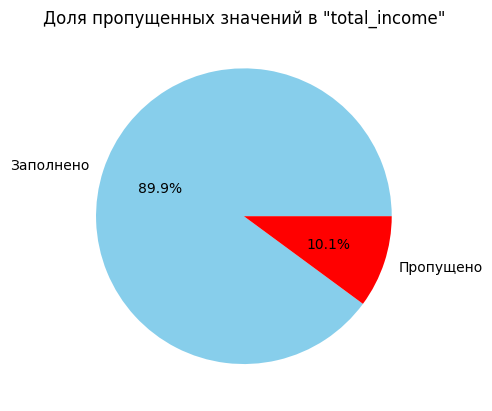

In [83]:
non = df["total_income"].isnull().sum()
total = df["total_income"].count()
full = [total, non]
labels = ['Заполнено', 'Пропущено']

plt.pie(full, labels=labels, colors=['skyblue','red'], autopct='%1.1f%%', wedgeprops={'linewidth': 0})
plt.title('Доля пропущенных значений в "total_income"')
plt.show()

1.3 Возможные причины появления пропусков в данных:
   1. Ошибки при передаче данных из других источников
   2. Некоторые клиенты не предоставили информацию при заполнении анкеты
   3. Некоторые записи могли содержать некорректные значения, которые не удалось обработать
   4. При некорректной обрабортке могла потеряться часть данных

1.4 Заполнение пропусков данными медианными значениями

In [84]:
mediana = df['total_income'].median()
df['total_income'] = df['total_income'].fillna(mediana)
df['total_income'].isnull().sum()

0

#### Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных?

Заполнение медианой относительно простой метод, легко интерпретируемый и реализуемый. Неудачный выбор метода заполнения пропусков может не только не улучшить, но и сильно ухудшить результаты.

2.1 Обработка значений в столбцах с аномалиями

In [85]:
def anomaly(value):
    if value < 0:
        value *= -1
    return value
df['days_employed'] = df['days_employed'].apply(anomaly)
df

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,4529.316663,43,среднее,1,гражданский брак,1,F,компаньон,0,224791.862382,операции с жильем
21521,0,343937.404131,67,среднее,1,женат / замужем,0,F,пенсионер,0,155999.806512,сделка с автомобилем
21522,1,2113.346888,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672.561153,недвижимость
21523,3,3112.481705,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093.050500,на покупку своего автомобиля


Возможные причины появления таких аномалий:
   1. Ошибки при сборе данный
   2. Ошибки при обработке данных
   3. Проблемы с хранением данных
   4. Проблемы с выгрузкой данных

2.2 Заполнение пропусков в  "days_employed" медианными значениями

In [86]:
mediana = df['days_employed'].median()
df['days_employed'] = df['days_employed'].fillna(mediana)
df['days_employed'].isnull().sum()

0

3. Замена вещественного типа данных в столбце total_income на целочисленный, например, с помощью метода astype().

In [87]:
df['total_income'] = df['total_income'].astype(int)
df['total_income']

0        253875
1        112080
2        145885
3        267628
4        158616
          ...  
21520    224791
21521    155999
21522     89672
21523    244093
21524     82047
Name: total_income, Length: 21525, dtype: int32

4. Удаление строк-дубликатов. Обработка неявных дубликатов

In [88]:
for column, series in df.items():
    if pd.api.types.is_string_dtype(series):
        if column == 'gender' or column == 'income_type' or column == 'purpose':
            continue
        df[column] = df[column].str.lower()
        df[column] = df[column].drop_duplicates()
df

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья
1,1,4024.803754,36,среднее,1,NaN,0,F,сотрудник,0,112080,приобретение автомобиля
2,0,5623.422610,33,NaN,1,NaN,0,M,сотрудник,0,145885,покупка жилья
3,3,4124.747207,32,NaN,1,NaN,0,M,сотрудник,0,267628,дополнительное образование
4,0,340266.072047,53,NaN,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу
...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,4529.316663,43,NaN,1,NaN,1,F,компаньон,0,224791,операции с жильем
21521,0,343937.404131,67,NaN,1,NaN,0,F,пенсионер,0,155999,сделка с автомобилем
21522,1,2113.346888,38,NaN,1,NaN,1,M,сотрудник,1,89672,недвижимость
21523,3,3112.481705,38,NaN,1,NaN,0,M,сотрудник,1,244093,на покупку своего автомобиля


Как был выбран метод: Использование метода приведения строк к нижнему регистру (str.lower()) и удаление дубликатов (drop_duplicates()) может быть обоснованным в определенных сценариях:
1. Единообразие данных
2. Экономия времени
3. Улучшение производительности
4. Устранение дубликатов

Дубликаты в данных могут возникнуть по разным причинам:
1. Ошибка при вводе данных
2. Проблемы при сборе данных
3. Обновление данных
4. Проблемы с процессом выгрузки данных

5. Создание новых датафреймов и удаление старых

In [89]:
education = df[['education']].drop_duplicates().reset_index(drop=True)
education['education_id'] = education.index
family_status = df[['family_status']].drop_duplicates().reset_index(drop=True)
family_status['family_status_id'] = family_status.index
df = df.merge(education)
df = df.merge(family_status)
df = df.drop('education', axis='columns')
df = df.drop('family_status', axis='columns')
df

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437.673028,42,0,0,F,сотрудник,0,253875,покупка жилья
1,0,597.273402,21,2,1,F,компаньон,0,86954,операции с коммерческой недвижимостью
2,1,2194.220567,23,2,1,F,компаньон,0,145017,сыграть свадьбу
3,1,361.295346,22,2,1,F,компаньон,0,59702,операции с жильем
4,2,2369.914285,45,2,1,F,сотрудник,0,120133,на проведение свадьбы
...,...,...,...,...,...,...,...,...,...,...
162,0,13264.142143,55,2,1,M,сотрудник,0,152595,на проведение свадьбы
163,0,1576.393455,39,2,1,M,компаньон,0,213192,строительство недвижимости
164,1,490.143881,27,2,1,F,сотрудник,0,295156,на проведение свадьбы
165,0,2194.220567,57,2,1,F,сотрудник,0,145017,свадьба


6. Создание столбца 'total_income_category' с категориями:

In [90]:
df['total_income_category'] = df['total_income']
for column, series in df.items():
    if column == 'total_income_category':
        df[column] = df[column].astype(int)
        for i in range(len(series)):
            if series[i] <= 30000:
                df.at[i, column] = 'E'
            elif series[i] <= 50000:
                df.at[i, column] = 'D'
            elif series[i] <= 200000:
                df.at[i, column] = 'C'
            elif series[i] <= 1000000:
                df.at[i, column] = 'B'
            else:
                df.at[i, column] = 'A'
df

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category
0,1,8437.673028,42,0,0,F,сотрудник,0,253875,покупка жилья,B
1,0,597.273402,21,2,1,F,компаньон,0,86954,операции с коммерческой недвижимостью,C
2,1,2194.220567,23,2,1,F,компаньон,0,145017,сыграть свадьбу,C
3,1,361.295346,22,2,1,F,компаньон,0,59702,операции с жильем,C
4,2,2369.914285,45,2,1,F,сотрудник,0,120133,на проведение свадьбы,C
...,...,...,...,...,...,...,...,...,...,...,...
162,0,13264.142143,55,2,1,M,сотрудник,0,152595,на проведение свадьбы,C
163,0,1576.393455,39,2,1,M,компаньон,0,213192,строительство недвижимости,B
164,1,490.143881,27,2,1,F,сотрудник,0,295156,на проведение свадьбы,B
165,0,2194.220567,57,2,1,F,сотрудник,0,145017,свадьба,C


Создание функции, которая на основании данных из столбца purpose формирует новый столбец purpose_category, в который войдут следующие категории:
1. 'операции с автомобилем',
2. 'операции с недвижимостью',
3. 'проведение свадьбы',
4. 'получение образования'.

In [91]:
df['purpose_category'] = df['purpose']
for column, series in df.items():
    if column == 'purpose_category':
        for i in range(len(series)):
            if series[i].__contains__('жиль') or series[i].__contains__('недвиж'):
                df.at[i, column] = 'операции с недвижимостью'
            elif series[i].__contains__('авто'):
                df.at[i, column] = 'операции с автомобилем'
            elif series[i].__contains__('свадь'):
                df.at[i, column] = 'проведение свадьбы'
            elif series[i].__contains__('образ'):
                df.at[i, column] = 'получение образования'
df

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
0,1,8437.673028,42,0,0,F,сотрудник,0,253875,покупка жилья,B,операции с недвижимостью
1,0,597.273402,21,2,1,F,компаньон,0,86954,операции с коммерческой недвижимостью,C,операции с недвижимостью
2,1,2194.220567,23,2,1,F,компаньон,0,145017,сыграть свадьбу,C,проведение свадьбы
3,1,361.295346,22,2,1,F,компаньон,0,59702,операции с жильем,C,операции с недвижимостью
4,2,2369.914285,45,2,1,F,сотрудник,0,120133,на проведение свадьбы,C,проведение свадьбы
...,...,...,...,...,...,...,...,...,...,...,...,...
162,0,13264.142143,55,2,1,M,сотрудник,0,152595,на проведение свадьбы,C,проведение свадьбы
163,0,1576.393455,39,2,1,M,компаньон,0,213192,строительство недвижимости,B,операции с недвижимостью
164,1,490.143881,27,2,1,F,сотрудник,0,295156,на проведение свадьбы,B,проведение свадьбы
165,0,2194.220567,57,2,1,F,сотрудник,0,145017,свадьба,C,проведение свадьбы


**Шаг 3.** Ответьте на вопросы:

- **Есть ли зависимость между количеством детей и возвратом кредита в срок?**
Да, так как расходы на детей могут влиять на финансовую стабильность. заемщики с детьми могут сталкиваться с увеличенными финансовыми обязательствами, что влечёт на вероятность возврата кредита в срок.

- **Есть ли зависимость между семейным положением и возвратом кредита в срок?**
Да, зависимость есть. Люди не в браке и не бывавшие браки имеют больший процент невозвратов в срок. Но те, кто развелись или овдовели, чаще платят в срок, чем люди в браке

- **Есть ли зависимость между уровнем дохода и возвратом кредита в срок?**
Зависимости между уровнем дохода и возвратом кредита в срок нет

- **Как разные цели кредита влияют на его возврат в срок?**
По данным исследования, за1мщики, использующие кредит для инвестиций или образования, чащевыполняют свои финансовые обязательства. Если смотреть на это с другой стороны, то кредиты на потребительские нужды могут иметьболее высокий уровень просрочек из-за менее конкретных целей и финансовой неопределённости

#### Шаг 4. Написать общий вывод.
В ходе лабораторной работы были внесены изменения в DataFrame, в котором отображается статистика по платежеспособности людей. Была произведена корекция аномалий, удалены дубликатов и заполнены пропущенные значения.